In [ ]:
import cv2
from PIL import Image
import numpy as np

from animeinsseg import AnimeInsSeg, AnimeInstances
from animeinsseg.anime_instances import get_color

In [ ]:
ckpt = r'models/AnimeInstanceSegmentation/rtmdetl_e60.ckpt'

mask_thres = 0.3
instance_thres = 0.3
refine_kwargs = {'refine_method': 'refinenet_isnet'} # set to None if not using refinenet
# refine_kwargs = None

imgp = 'examples/1562990.jpg'
img = cv2.imread(imgp)


net = AnimeInsSeg(ckpt, mask_thr=mask_thres, refine_kwargs=refine_kwargs)
instances: AnimeInstances = net.infer(
    img,
    output_type='numpy',
    pred_score_thr=instance_thres
)



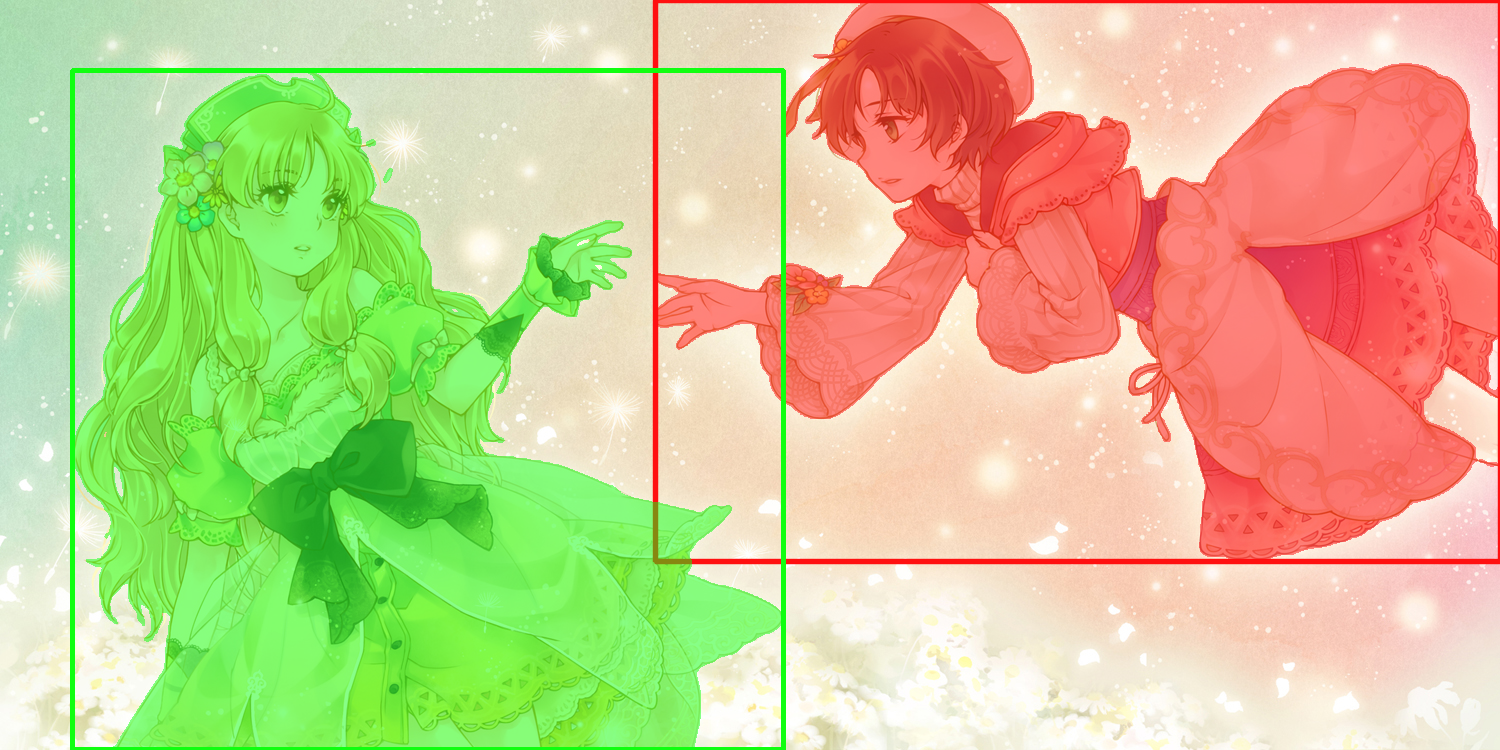

In [4]:

drawed = img.copy()
im_h, im_w = img.shape[:2]

# instances.bboxes, instances.masks will be None, None if no obj is detected

for ii, (xywh, mask) in enumerate(zip(instances.bboxes, instances.masks)):
    color = get_color(ii)

    mask_alpha = 0.5
    linewidth = max(round(sum(img.shape) / 2 * 0.003), 2)

    # draw bbox
    p1, p2 = (int(xywh[0]), int(xywh[1])), (int(xywh[2] + xywh[0]), int(xywh[3] + xywh[1]))
    cv2.rectangle(drawed, p1, p2, color, thickness=linewidth, lineType=cv2.LINE_AA)
    
    # draw mask
    p = mask.astype(np.float32)
    blend_mask = np.full((im_h, im_w, 3), color, dtype=np.float32)
    alpha_msk = (mask_alpha * p)[..., None]
    alpha_ori = 1 - alpha_msk
    drawed = drawed * alpha_ori + alpha_msk * blend_mask

drawed = drawed.astype(np.uint8)
Image.fromarray(drawed[..., ::-1])
